# Rear Tire Cornering Analysis
## R25B 18.0 x 7.5-10 on 7" Rim
### Comparing Different Influences on Tire Load Outputs

In [3]:
import scipy.io as sio
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import copy

import sys
sys.path.append("/")
import data_helpers

### Import tire data & Show distribution of samples on variable sweeps

In [4]:
df = data_helpers.import_data(sio.loadmat("tire_data/processed_data/cornering_2021_rears.mat"))

print(df)

variable_sweeps = {"load" : {"sweep" : np.array([-250, -200, -150, -100, -50]) / 0.224809, "label" : "FZ" },
                    "camber" : {"sweep" : np.array([0, 2, 4]), "label" : "IA"},
                    "pressure" : {"sweep" : np.array([8, 10, 12, 14]) * 6.89476, "label" : "P"},
                    "velocity" : {"sweep" : np.array([15, 25, 45]) * 1.60934, "label" : "V"}}

for variable, info in variable_sweeps.items():
    count = df.groupby([variable])[variable].count()
    variable_sweeps[variable]["count"] = count
    print(count, "\n")

FileNotFoundError: [Errno 2] No such file or directory: 'tire_data/processed_data/cornering_2021_rears.mat'

### Comparing lateral force and self aligning moment against slip angle for different pressures. Holds camber, velocity, and load constant by choosing most commonly used value.

In [ ]:
temp_df = copy.copy(df)
for variable, info in variable_sweeps.items():
    if variable != "pressure":
        temp_df = temp_df[temp_df[variable] == info["count"].idxmax()]

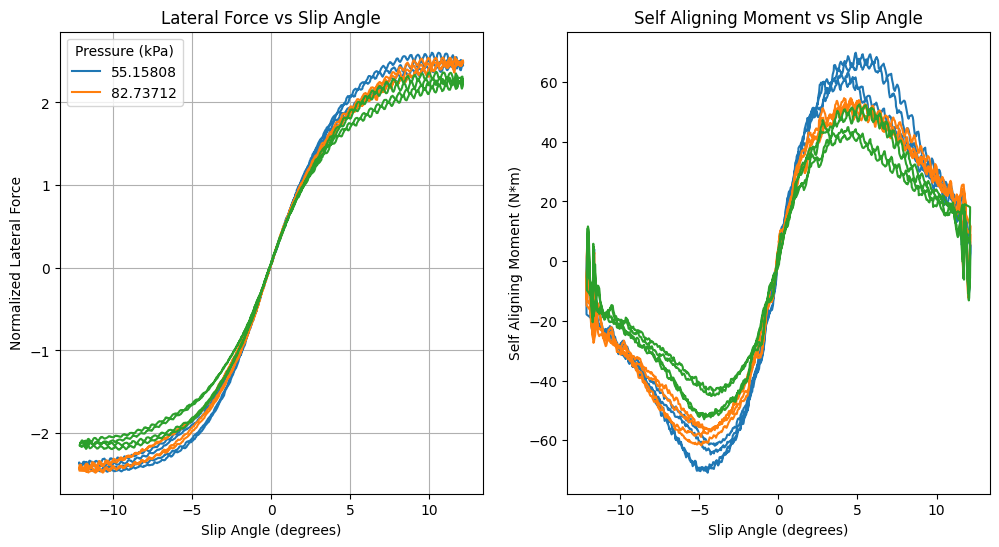

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

for i, g in temp_df.groupby(["pressure"]):
    plt.plot(g["SA"], g["NFY"])
plt.legend(variable_sweeps["pressure"]["sweep"], title = "Pressure (kPa)")
plt.title("Lateral Force vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Normalized Lateral Force")
plt.grid()
plt.subplot(1, 2, 2)
for i, g in temp_df.groupby(["pressure"]):
    plt.plot(g["SA"], g["MZ"])
plt.title("Self Aligning Moment vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Self Aligning Moment (N*m)")

plt.show()

Based on this graph, it is clear the 82.74 kPa (12 psi) pressure is optimal for the tire because it maximizes lateral force

### Comparing lateral force and self aligning moment against slip angle for different cambers. Holds pressure, velocity, and load constant by choosing most commonly used value.

In [ ]:
temp_df = copy.copy(df)
for variable, info in variable_sweeps.items():
    if variable != "camber":
        temp_df = temp_df[temp_df[variable] == info["count"].idxmax()]

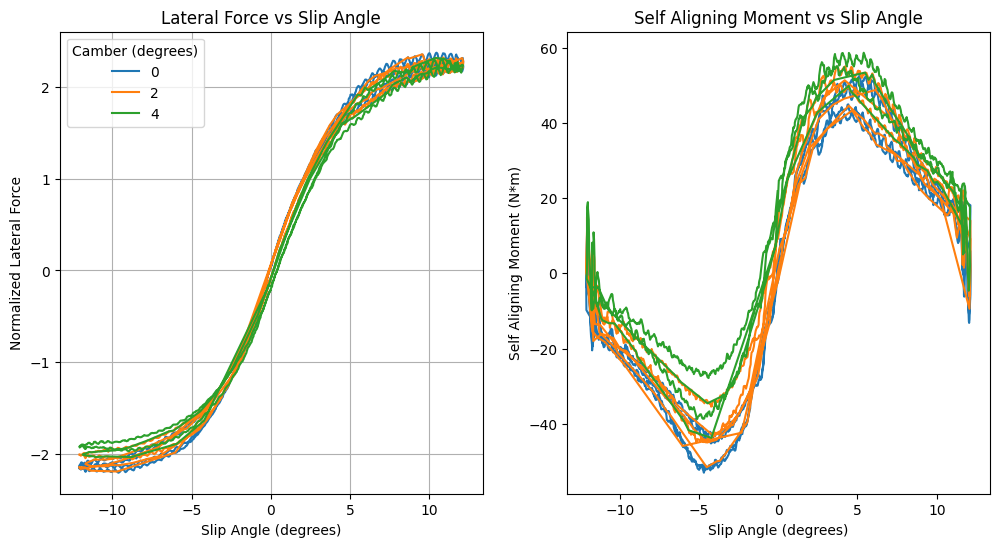

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

for i, g in temp_df.groupby(["camber"]):
    plt.plot(g["SA"], g["NFY"])
plt.legend(variable_sweeps["camber"]["sweep"], title = "Camber (degrees)")
plt.title("Lateral Force vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Normalized Lateral Force")
plt.grid()
plt.subplot(1, 2, 2)
for i, g in temp_df.groupby(["camber"]):
    plt.plot(g["SA"], g["MZ"])
plt.title("Self Aligning Moment vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Self Aligning Moment (N*m)")

plt.show()

Based on this graph, the closer the camber is to zero, the more optimal for the tire because it maximizes lateral force

### Comparing lateral force and self aligning moment against slip angle for different velocities. Holds pressure, camber, and load constant by choosing most commonly used value.

In [ ]:
temp_df = copy.copy(df)
for variable, info in variable_sweeps.items():
    if variable != "velocity":
        temp_df = temp_df[temp_df[variable] == info["count"].idxmax()]

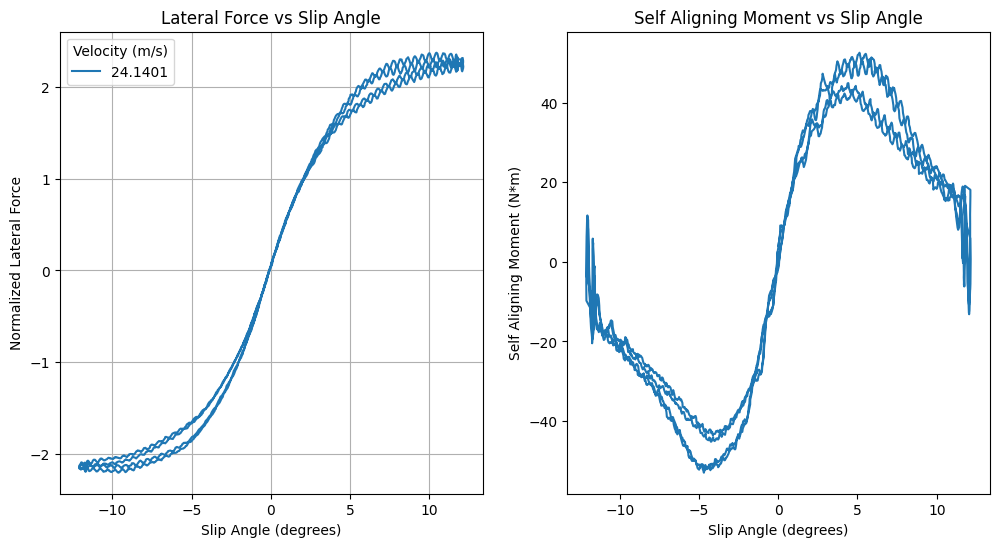

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

for i, g in temp_df.groupby(["velocity"]):
    plt.plot(g["SA"], g["NFY"])
plt.legend(variable_sweeps["velocity"]["sweep"], title = "Velocity (m/s)")
plt.title("Lateral Force vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Normalized Lateral Force")
plt.grid()
plt.subplot(1, 2, 2)
for i, g in temp_df.groupby(["velocity"]):
    plt.plot(g["SA"], g["MZ"])
plt.title("Self Aligning Moment vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Self Aligning Moment (N*m)")

plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
for i, g in temp_df.groupby(["velocity"]):
    h = g[(g["SA"] > 9.98) & (g["SA"] <= 10)]
    print(h.head(), "\n")   

       AMBTMP        ET      FX        FY        FZ     IA     MX     MZ  \
40212   27.32  1494.913  -9.319 -2544.288 -1093.591 -0.012  30.41  24.05   
45208   27.32  1630.103 -11.326 -2456.385 -1094.404 -0.018  29.43  21.42   
45333   27.33  1631.353 -13.584 -2372.689 -1106.906 -0.019  28.20  18.35   

          N     NFX     NFY      P         RE     RL    RST  RUN     SA   SL  \
40212  0.26  0.0050  2.3647  97.89   40617.94  19.38  35.62   15  9.985 -0.0   
45208  0.05  0.0133  2.2078  98.29  195775.73  19.41  36.02   15  9.987 -0.0   
45333  0.12  0.0219  2.1213  96.72   86320.07  19.39  36.90   15  9.997 -0.0   

           SR   TSTC   TSTI   TSTO      V         load  camber  pressure  \
40212 -0.9995  56.46  51.67  56.24  40.25 -1112.055122       0  96.52664   
45208 -0.9999  59.35  55.08  54.39  40.16 -1112.055122       0  96.52664   
45333 -0.9998  67.97  63.18  58.51  40.27 -1112.055122       0  96.52664   

       velocity  
40212   40.2335  
45208   40.2335  
45333   40.2335